In [1]:
import os
import getpass
import numpy as np
import pandas as pd
from functools import reduce
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Model Liberay
import rf_model

# Random Forrest

## 1. Load data

In [4]:
# Gå et niveau op og naviger til mappen "Data"
os.chdir('../Data')

In [5]:
# Import features
file_path = 'Merged_dataset.csv'
df = pd.read_csv("merged_dataset.csv", sep=";", parse_dates=["Date"])
df.set_index("Date", inplace=True)
df.shape

(156, 184)

In [6]:
y = df.iloc[:, 0]   # første kolonne = inflation
X = df.iloc[:, 1:]  # resten = forklarende variable

# Tjek dimensioner
print("y shape:", y.shape)
print("X shape:", X.shape)

y shape: (156,)
X shape: (156, 183)


## 2. Imputer manglende værdier

In [8]:
imputer = SimpleImputer(strategy="median")  # Eller "median"

X_imputed = imputer.fit_transform(X)  # Imputer NaN i hele datasættet

# Konverter tilbage til DataFrame med kolonnenavne
X = pd.DataFrame(X_imputed, columns=X.columns, index = df.index)

## 3. Standardiser data 

In [10]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Run the RF forecast model

In [12]:
forecast_horizon = 5
Trees = 100
%time forecast_df = rf_model.RandomForrest_Forecaster(X, y, forecast_horizon, scaler, Trees, last_observation_date="2024-12-01")


=== Horizon 0 ===
Antal træningsobservationer: 156
Antal Regressor: 183.00000

=== Horizon 1 ===
Antal træningsobservationer: 155
Antal Regressor: 183.00000

=== Horizon 2 ===
Antal træningsobservationer: 154
Antal Regressor: 183.00000

=== Horizon 3 ===
Antal træningsobservationer: 153
Antal Regressor: 183.00000

=== Horizon 4 ===
Antal træningsobservationer: 152
Antal Regressor: 183.00000

Forudsagte måneder:
2025-01
2025-02
2025-03
2025-04
2025-05
CPU times: user 4.26 s, sys: 43.8 ms, total: 4.31 s
Wall time: 4.31 s


In [13]:
forecast_df

,Dato,Inflationsforecast
0,2025-01-01,2.03841
1,2025-02-01,2.27915
2,2025-03-01,1.46208
3,2025-04-01,1.60748
4,2025-05-01,2.05830


# Forecast with a Rolling Window

In [15]:
forecast_horizon = 12 # 1 year
window_length = 9*12 # 12 Years
last_observation_date = "2024-12-01"

forecast_df = rf_model.RandomForest_Forecaster_Rolling(X, y, forecast_horizon, last_observation_date, scaler, window_length, verbose = True)



=== Horisont h=1 ===
Antal træningsobservationer: 108
Antal regressorer: 183

=== Horisont h=2 ===
Antal træningsobservationer: 107
Antal regressorer: 183

=== Horisont h=3 ===
Antal træningsobservationer: 106
Antal regressorer: 183

=== Horisont h=4 ===
Antal træningsobservationer: 105
Antal regressorer: 183

=== Horisont h=5 ===
Antal træningsobservationer: 104
Antal regressorer: 183

=== Horisont h=6 ===
Antal træningsobservationer: 103
Antal regressorer: 183

=== Horisont h=7 ===
Antal træningsobservationer: 102
Antal regressorer: 183

=== Horisont h=8 ===
Antal træningsobservationer: 101
Antal regressorer: 183

=== Horisont h=9 ===
Antal træningsobservationer: 100
Antal regressorer: 183

=== Horisont h=10 ===
Antal træningsobservationer: 99
Antal regressorer: 183

=== Horisont h=11 ===
Antal træningsobservationer: 98
Antal regressorer: 183

=== Horisont h=12 ===
Antal træningsobservationer: 97
Antal regressorer: 183

Forudsagte måneder:
2025-01
2025-02
2025-03
2025-04
2025-05
202

In [16]:
forecast_df

,Dato,Inflationsforecast,Horizon
0,2025-01-01,1.892583,0
1,2025-02-01,1.970889,1
2,2025-03-01,2.175269,2
3,2025-04-01,1.774148,3
4,2025-05-01,2.338491,4
5,2025-06-01,3.185204,5
6,2025-07-01,6.943981,6
7,2025-08-01,6.920648,7
8,2025-09-01,5.651213,8
9,2025-10-01,3.587667,9


# Rolling Forecasts

In [21]:
forecast_results = rf_model.run_rolling_forecast(X, y, Trees, scaler, forecast_horizon=12,  start_date="2023-01-01", end_date="2024-12-01")


=== Forecast lavet i: 2023-01 ===

=== Forecast lavet i: 2023-02 ===

=== Forecast lavet i: 2023-03 ===

=== Forecast lavet i: 2023-04 ===

=== Forecast lavet i: 2023-05 ===

=== Forecast lavet i: 2023-06 ===

=== Forecast lavet i: 2023-07 ===

=== Forecast lavet i: 2023-08 ===

=== Forecast lavet i: 2023-09 ===

=== Forecast lavet i: 2023-10 ===

=== Forecast lavet i: 2023-11 ===

=== Forecast lavet i: 2023-12 ===

=== Forecast lavet i: 2024-01 ===

=== Forecast lavet i: 2024-02 ===

=== Forecast lavet i: 2024-03 ===

=== Forecast lavet i: 2024-04 ===

=== Forecast lavet i: 2024-05 ===

=== Forecast lavet i: 2024-06 ===

=== Forecast lavet i: 2024-07 ===

=== Forecast lavet i: 2024-08 ===

=== Forecast lavet i: 2024-09 ===

=== Forecast lavet i: 2024-10 ===

=== Forecast lavet i: 2024-11 ===

=== Forecast lavet i: 2024-12 ===


In [22]:
forecast_results

,Dato,Inflationsforecast,Horizon,Forecast_made_in
0,2023-02-01,8.01154,0,2023-01-01
1,2023-03-01,7.91897,1,2023-01-01
2,2023-04-01,7.86096,2,2023-01-01
3,2023-05-01,7.84824,3,2023-01-01
4,2023-06-01,8.40368,4,2023-01-01
...,...,...,...,...
283,2025-08-01,7.30233,7,2024-12-01
284,2025-09-01,6.36493,8,2024-12-01
285,2025-10-01,4.12980,9,2024-12-01
286,2025-11-01,1.58940,10,2024-12-01


In [24]:
eval_df, merged_df = rf_model.evaluate_forecasts(forecast_results, y)
eval_df

,Horizon,MAE,RMSE,N_obs
0,0,0.730830,1.030708,23
1,1,1.362585,1.848379,22
2,2,1.734940,2.232428,21
3,3,2.318841,2.717664,20
4,4,3.272256,3.668110,19
5,5,3.123194,3.667906,18
6,6,2.860704,3.671483,17
7,7,3.462203,4.430062,16
8,8,5.137777,5.552911,15
9,9,5.546143,5.721647,14


Note: det giver mening at N_obs flader med fordi de ligger ude i fremtiden

## results

In [27]:
h1 = merged_df[merged_df["Horizon"] == 0]
h1

,Dato,Inflationsforecast,Horizon,Forecast_made_in,y_true,error,abs_error,squared_error
0,2023-02-01,8.01154,0,2023-01-01,7.601,0.41054,0.41054,0.168543
12,2023-03-01,7.81628,0,2023-02-01,6.733,1.08328,1.08328,1.173496
24,2023-04-01,7.02304,0,2023-03-01,5.282,1.74104,1.74104,3.031220
36,2023-05-01,5.85694,0,2023-04-01,2.928,2.92894,2.92894,8.578690
48,2023-06-01,3.84426,0,2023-05-01,2.465,1.37926,1.37926,1.902358
60,2023-07-01,2.99634,0,2023-06-01,3.133,-0.13666,0.13666,0.018676
72,2023-08-01,3.21987,0,2023-07-01,2.437,0.78287,0.78287,0.612885
84,2023-09-01,2.72552,0,2023-08-01,0.859,1.86652,1.86652,3.483897
96,2023-10-01,1.54002,0,2023-09-01,0.085,1.45502,1.45502,2.117083
108,2023-11-01,0.83316,0,2023-10-01,0.600,0.23316,0.23316,0.054364


In [28]:
sum_23 = h1["Inflationsforecast"].iloc[0:11].sum() / 12
sum_t23 = h1["y_true"].iloc[0:11].sum() / 12

sum_r = h1["Inflationsforecast"].iloc[11:24].sum() / 12
sum_t = h1["y_true"].iloc[11:24].sum() / 12
print(sum_23)
print(sum_t23)

3.714482499999999
2.7344166666666667


1. Husk, at Python-indeksering starter ved 0. 
   Det betyder, at når modellen intern bruger h=0, så svarer det til forecast for 1 måned frem (altså Horizon = 1 i output).

2. For hver måned, hvor vi laver et forecast (fx jan, feb, mar, ...), forudsiger vi inflation 12 måneder frem.
   Det betyder, at vi får 12 forecasts per måned.
   Det samlede antal observationer i forecast-tabellen er derfor:
   antal måneder × forecast-horisont = total antal forecasts

   Eksempel:
   - Forecasts laves fra jan 2023 til dec 2024 → 24 måneder
   - 12 forecast-horisonter per måned → 24 × 12 = 288 observationer
   (se `forecast_results`)

3. Horizon angiver, hvor langt ude i fremtiden et forecast gælder – målt i måneder.
   - Horizon = 1 → forudsiger næste måneds inflation (lavet i måned t → gælder måned t+1)
   - Horizon = 2 → forudsiger to måneder frem (lavet i t → gælder t+2)
   osv.
   (Bemærk: når koden bruger `h = 0`, betyder det forecast for én måned frem)

4. Ud fra `eval_df` kan vi se, at Random Forest præsterer bedst ved korte horisonter – særligt de første 3 måneder (Horizon = 1–3).
   Her er fejlene (MAE/RMSE) lavest, mens de stiger ved længere horisonter.


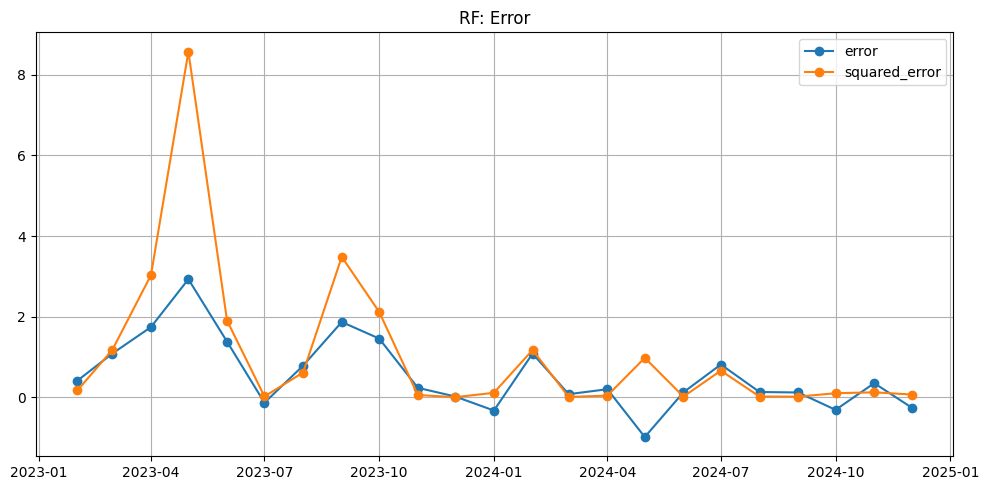

In [30]:
plt.figure(figsize=(10, 5))
plt.plot(h1["Dato"], h1["error"], label="error", marker="o")
#plt.plot(h1["Dato"], h1["abs_error"], label="abs_error", marker="o")
plt.plot(h1["Dato"], h1["squared_error"], label="squared_error", marker="o")
plt.legend()
plt.title("RF: Error")
plt.grid(True)
plt.tight_layout()
plt.show()

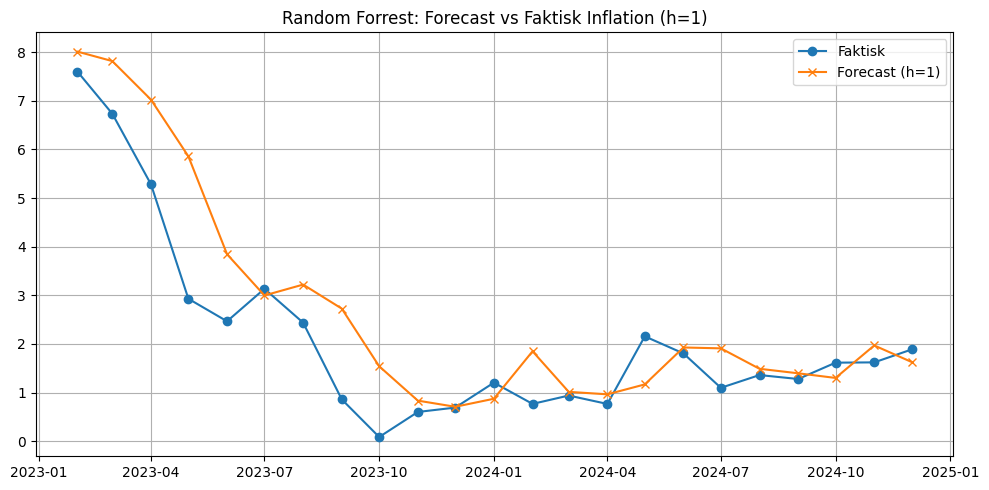

In [31]:
plt.figure(figsize=(10, 5))
plt.plot(h1["Dato"], h1["y_true"], label="Faktisk", marker="o")
plt.plot(h1["Dato"], h1["Inflationsforecast"], label="Forecast (h=1)", marker="x")
plt.legend()
plt.title("Random Forrest: Forecast vs Faktisk Inflation (h=1)")
plt.grid(True)
plt.tight_layout()
plt.show()